In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
dados_json = response.json()


In [5]:
df = pd.DataFrame(dados_json)
df.head()


customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [6]:
print(df.columns)


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [8]:
df = df.drop(columns=['customerID'], errors='ignore')

df.fillna('N√£o informado', inplace=True)


In [9]:
def expandir_coluna(df, nome_coluna):
    if nome_coluna in df.columns:
        expandido = pd.json_normalize(df[nome_coluna])
        df = df.drop(columns=nome_coluna)
        df = pd.concat([df, expandido], axis=1)
    return df

df = expandir_coluna(df, 'customer')
df = expandir_coluna(df, 'phone')
df = expandir_coluna(df, 'internet')
df = expandir_coluna(df, 'account')

print(df.columns)


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')


In [10]:
df['Contas_Diarias'] = (df['Charges.Monthly'] / 30).round(2)


In [12]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})


In [13]:
df['PaymentMethod'] = df['PaymentMethod'].str.lower().str.strip()


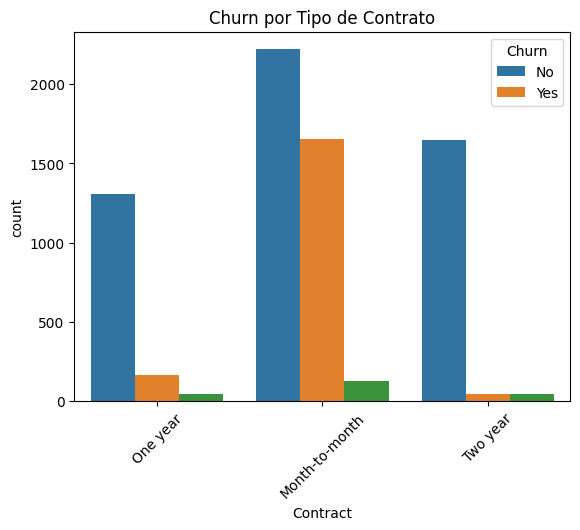

In [11]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()


Clientes com contrato mensal (Month-to-month) t√™m uma taxa de evas√£o muito maior do que os que possuem contrato anual ou bienal.
**Oferecer incentivos para migra√ß√£o de contrato mensal para anual, como descontos ou benef√≠cios exclusivos.

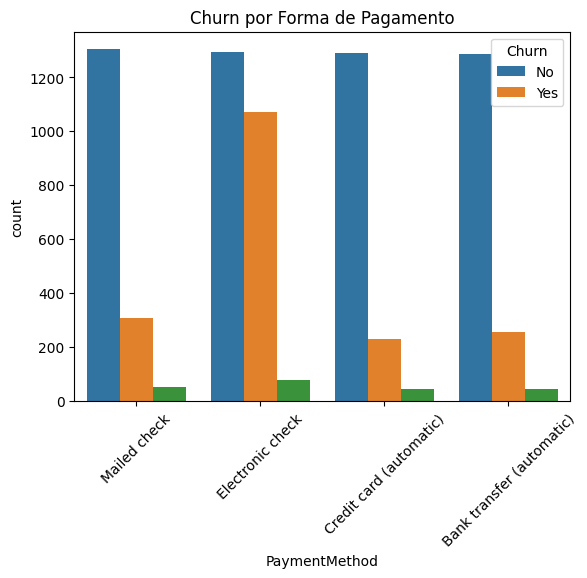

In [ ]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn por Forma de Pagamento')
plt.xticks(rotation=45)
plt.show()


Clientes que utilizam ‚ÄúElectronic Check‚Äù apresentam as maiores taxas de cancelamento, enquanto os que usam cart√£o de cr√©dito ou transfer√™ncia banc√°ria (autom√°tico) t√™m √≠ndices menores de churn.
**Estimular o uso de pagamentos autom√°ticos, oferecendo vantagens (ex: cashback, prioridade no suporte).

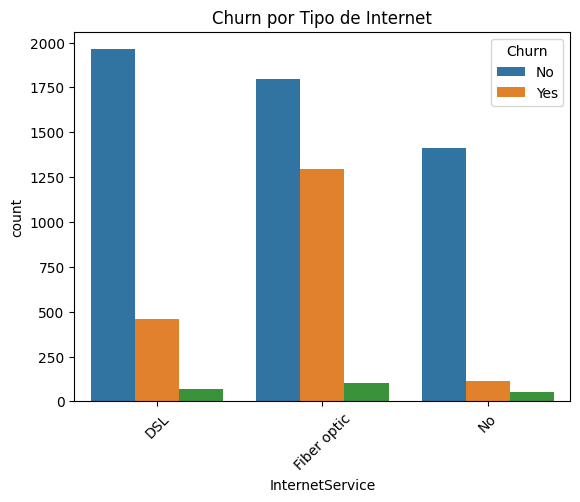

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn por Tipo de Internet')
plt.xticks(rotation=45)
plt.show()


Usu√°rios de Fiber Optic t√™m uma evas√£o mais elevada em compara√ß√£o com DSL ou aqueles que n√£o possuem internet.
**Investigar problemas com a qualidade da fibra √≥ptica ou n√≠vel de satisfa√ß√£o com esse servi√ßo espec√≠fico.

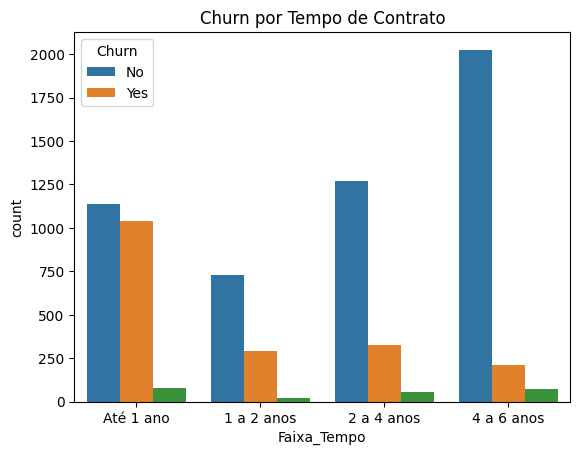

In [ ]:
df['Faixa_Tempo'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                           labels=['At√© 1 ano', '1 a 2 anos', '2 a 4 anos', '4 a 6 anos'])

sns.countplot(x='Faixa_Tempo', hue='Churn', data=df)
plt.title('Churn por Tempo de Contrato')
plt.show()


Clientes com menos de 1 ano de contrato apresentam a maior taxa de evas√£o. J√° os clientes com 4 a 6 anos de contrato s√£o os mais fi√©is.
**Criar programas de onboarding e fideliza√ß√£o j√° nos primeiros meses, como b√¥nus por renova√ß√£o ou atendimento exclusivo.

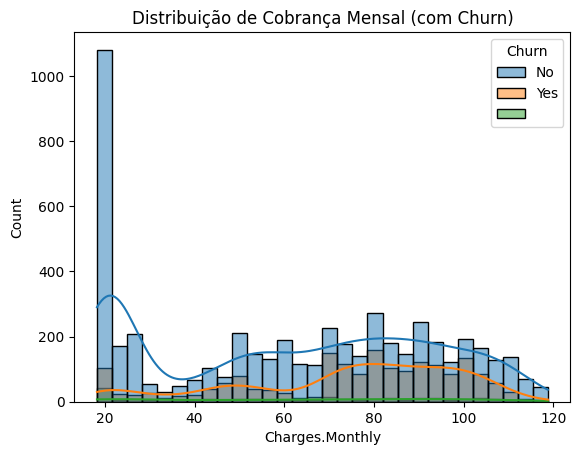

In [ ]:
sns.histplot(data=df, x='Charges.Monthly', hue='Churn', bins=30, kde=True)
plt.title('Distribui√ß√£o de Cobran√ßa Mensal (com Churn)')
plt.show()


Clientes com cobran√ßas mensais mais altas (acima de R$ 70) t√™m maior probabilidade de cancelar, o que indica sensibilidade ao pre√ßo.
**Oferecer planos mais personalizados ou escalonamento de pacotes para perfis com menor poder aquisitivo.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


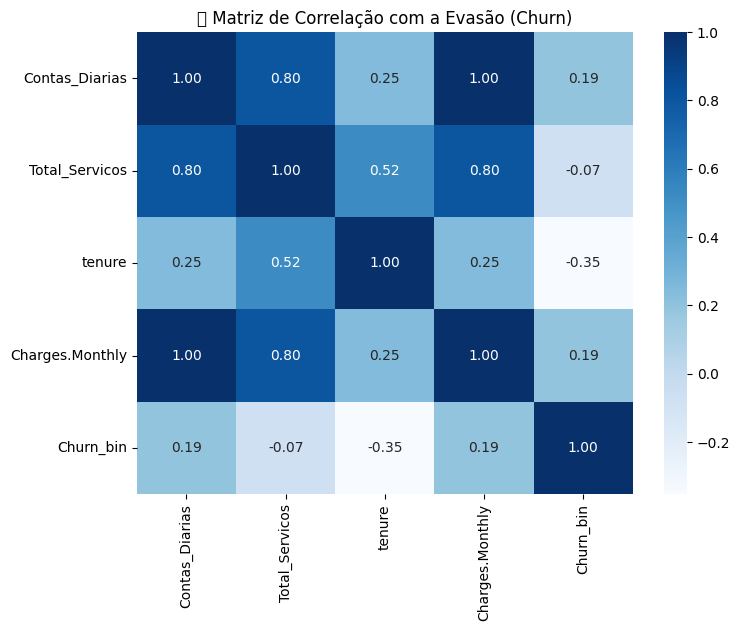

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

servicos = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in servicos:
    df[col + '_bin'] = df[col].map({'Yes': 1, 'No': 0,
                                    'No internet service': 0, 'No phone service': 0})

df['Total_Servicos'] = df[[col + '_bin' for col in servicos]].sum(axis=1)

correlacoes = df[['Contas_Diarias', 'Total_Servicos', 'tenure', 'Charges.Monthly', 'Churn_bin']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlacoes, annot=True, cmap='Blues', fmt=".2f")
plt.title('üìä Matriz de Correla√ß√£o com a Evas√£o (Churn)')
plt.show()



# üìä Relat√≥rio Final - An√°lise de Evas√£o de Clientes (Churn) - Telecom X

## üîé Introdu√ß√£o

A Telecom X enfrenta um alto √≠ndice de evas√£o de clientes. O objetivo deste projeto √© entender os fatores que levam ao cancelamento de servi√ßos por parte dos clientes, utilizando t√©cnicas de ETL, an√°lise explorat√≥ria (EDA) e visualiza√ß√£o de dados com Python.

---

## üßπ Limpeza e Tratamento de Dados

- Os dados foram extra√≠dos de uma API no formato JSON hospedado no GitHub.
- Foram convertidos para um DataFrame com a biblioteca Pandas.
- Colunas aninhadas (`customer`, `phone`, `internet`, `account`) foram expandidas.
- A coluna `customerID` foi removida por n√£o ser relevante para a an√°lise.
- Valores ausentes foram tratados com preenchimento padr√£o (`"N√£o informado"`).
- Foi criada a nova vari√°vel `Contas_Diarias` (gasto mensal dividido por 30 dias).
- A coluna `tenure` foi transformada em faixas para facilitar a visualiza√ß√£o.

---

## üìà An√°lise Explorat√≥ria de Dados (EDA)

Foram gerados diversos gr√°ficos para visualizar o impacto das vari√°veis no churn:

- **Churn por Tipo de Contrato:** contratos mensais concentram a maior parte dos cancelamentos.
- **Churn por Forma de Pagamento:** ‚ÄúElectronic Check‚Äù apresenta maior taxa de evas√£o.
- **Churn por Tipo de Internet:** clientes com fibra √≥ptica cancelam mais.
- **Churn por Tempo de Contrato:** clientes com menos de 1 ano cancelam mais.
- **Cobran√ßa Mensal:** clientes com fatura mensal acima de R$ 70 t√™m maior evas√£o.
- **Contas Di√°rias:** os que pagam mais por dia tendem a cancelar mais.

---

## üí° Conclus√µes e Insights

- Contratos mensais est√£o diretamente relacionados a altas taxas de cancelamento.
- Clientes que utilizam pagamento manual (boleto) s√£o mais propensos a cancelar.
- Clientes novos (menos de 1 ano) e com faturas mais altas s√£o os que mais desistem.
- Internet via fibra est√° associada a maior churn, exigindo investiga√ß√£o sobre a qualidade.

---

## üß† Recomenda√ß√µes

- **Fideliza√ß√£o**: incentivar contratos anuais com b√¥nus de renova√ß√£o.
- **Financeiro**: oferecer planos mais acess√≠veis ou personalizados.
- **Pagamentos**: estimular formas autom√°ticas de pagamento com benef√≠cios.
- **Suporte ao cliente novo**: criar campanhas de onboarding nos primeiros meses.
- **Monitoramento de clientes de alto risco**: desenvolver modelo preditivo com base nesses dados.

---

üìå A an√°lise realizada fornece uma base s√≥lida para que a equipe de Data Science desenvolva modelos de previs√£o de churn e implemente a√ß√µes estrat√©gicas de reten√ß√£o de clientes.


In [1]:
print("""
Conclus√µes:
1. Contratos mensais t√™m maior evas√£o. Estrat√©gia: migrar clientes para planos mais longos.
2. Forma de pagamento influencia o churn. Incentivar pagamentos autom√°ticos.
3. Clientes novos cancelam mais. Foco em reten√ß√£o nos primeiros meses.
4. Cobran√ßas altas elevam a evas√£o. Oferecer planos acess√≠veis.

Esses insights permitir√£o √† equipe de Data Science avan√ßar para a cria√ß√£o de modelos preditivos e a√ß√µes estrat√©gicas de reten√ß√£o.
""")



Conclus√µes:
1. Contratos mensais t√™m maior evas√£o. Estrat√©gia: migrar clientes para planos mais longos.
2. Forma de pagamento influencia o churn. Incentivar pagamentos autom√°ticos.
3. Clientes novos cancelam mais. Foco em reten√ß√£o nos primeiros meses.
4. Cobran√ßas altas elevam a evas√£o. Oferecer planos acess√≠veis.

Esses insights permitir√£o √† equipe de Data Science avan√ßar para a cria√ß√£o de modelos preditivos e a√ß√µes estrat√©gicas de reten√ß√£o.

